# 4) Data Analytics I
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains 
information about various houses in Boston through different parameters. There are 506 samples and 13 feature variables in this dataset.

The objective is to predict the value of prices of the house using the given features.

In [2]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [3]:
# importing data
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 
                'LSTAT', 'MEDV']
df = pd.read_csv("housing.csv",
                 header=None,delimiter=r"\s+",names=column_names)


In [4]:
df.head(5)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

In [8]:
reg = LinearRegression()

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.33, random_state= 42)

In [10]:
reg.fit(x_train, y_train)

LinearRegression()

In [11]:
print(reg.coef_)

[-0.67873898  4.82035621]


In [12]:
y_pred = reg.predict(x_test)
print(y_pred)

[25.74505916 31.13347279 17.52883188 26.44227535 19.58541492 23.09596513
 17.01975517 14.3159995  22.24408223 20.27941136 17.47639133 18.28843618
 -2.36312381 22.61827496 20.4996517  26.68544392 17.36009694  3.69380472
 36.89790451 18.4618195  26.55958698 27.31886979 13.15264811 26.17065665
 19.24831147 14.8012021  23.09170175 20.68560431 17.96095488 19.31237833
 17.84180325 27.04214245 27.08246715 19.88385388 15.41933731 17.75557917
 32.8523954  22.59248268 20.23378068 25.93888672 12.58663197 28.85716926
 37.72542766 19.03383346 25.90598948 16.87892513 15.97944452 27.32455396
 19.62393282 29.26717607 20.91210827 31.42628427 17.85408818 28.43436158
 34.81669984 24.19848407 19.67096965 31.76571727 25.22124093 15.44202903
 27.10068247 32.63148179 29.98436944 19.31885888 28.94030062 11.04135456
 20.52596775 26.77021299 29.81155093 16.85707475 19.23987853 28.23741881
 13.02461894 25.78651245 23.57979189  6.476231   22.3117392  36.22171593
 18.19486773 10.78148919 23.35513475 10.11068577 22

In [13]:
print(y_test)

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
110    21.7
321    23.1
265    22.8
29     21.0
262    48.8
Name: MEDV, Length: 167, dtype: float64


In [14]:
print( np.mean((y_pred - y_test)**2 ))

28.97075021100663


In [15]:
from sklearn.metrics import mean_squared_error
print( mean_squared_error(y_test, y_pred))

28.97075021100663


In [16]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(f'Mean Squared Error: {mse}',f'Mean Absolute Error: {mae}',f'Root Mean Squared Error: {rmse}',sep='\n')

Mean Squared Error: 28.97075021100663
Mean Absolute Error: 4.019105583285634
Root Mean Squared Error: 5.382448347267871


/var/folders/z6/40r9qmyn6d9cft3g1q1nwvdw0000gn/T/ipykernel_32338/3761460322.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MEDV'], bins=30)


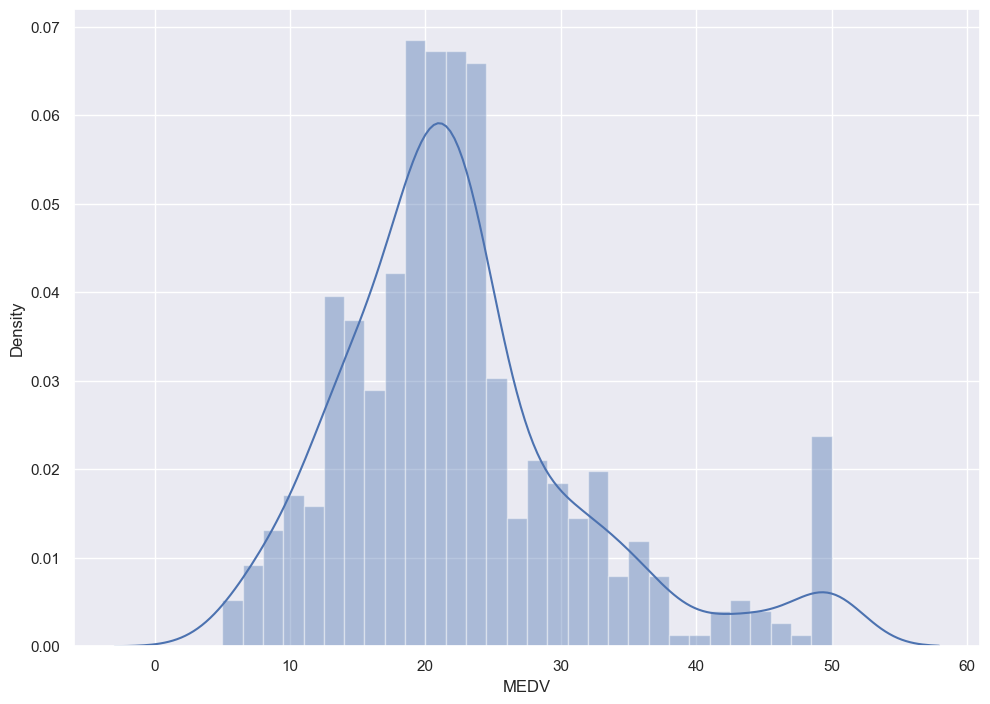

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MEDV'], bins=30)
plt.show()